In [10]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from figures.plotting import plot_correlations

benchmark = 'dicarlo.MajajHong2015.IT.public-pls'
eigmetric = 'effective dimensionality'
pooling_enc = False
pooling_eig = True
grayscale_eig = False

data = pd.merge(pd.read_csv(f'../results/encoding|benchmark:{benchmark}|pooling:{pooling_enc}.csv'),
                pd.read_csv(f'../results/eigmetrics|pooling:{pooling_eig}|grayscale:{grayscale_eig}.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,layer,score,score_error,architecture,task,kind,source,80% variance,alpha,effective dimensionality
0,layer1.0.relu,0.204081,0.003728,ResNet18,None,Untrained,PyTorch,6.0,1.399630,2.787072
1,layer1.1.relu,0.208386,0.004585,ResNet18,None,Untrained,PyTorch,6.0,1.374839,2.731918
2,layer2.0.relu,0.217741,0.004420,ResNet18,None,Untrained,PyTorch,13.0,1.438830,3.199565
3,layer2.1.relu,0.218863,0.003893,ResNet18,None,Untrained,PyTorch,11.0,1.307675,2.921467
4,layer3.0.relu,0.219415,0.004056,ResNet18,None,Untrained,PyTorch,26.0,1.329084,3.456479


---
# All models and layers

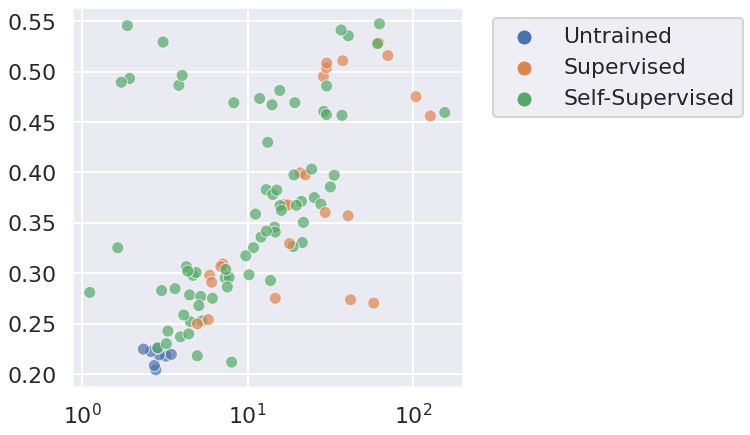

In [11]:
fig = plt.figure(figsize=(7, 7))
results = data[(data.architecture == 'ResNet18')]
ax = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', plt_kwargs={'alpha': 0.7})
ax.set(xlabel=None, ylabel=None, xscale='log')
plt.show()

---
# Untrained and Supervised Object Classification

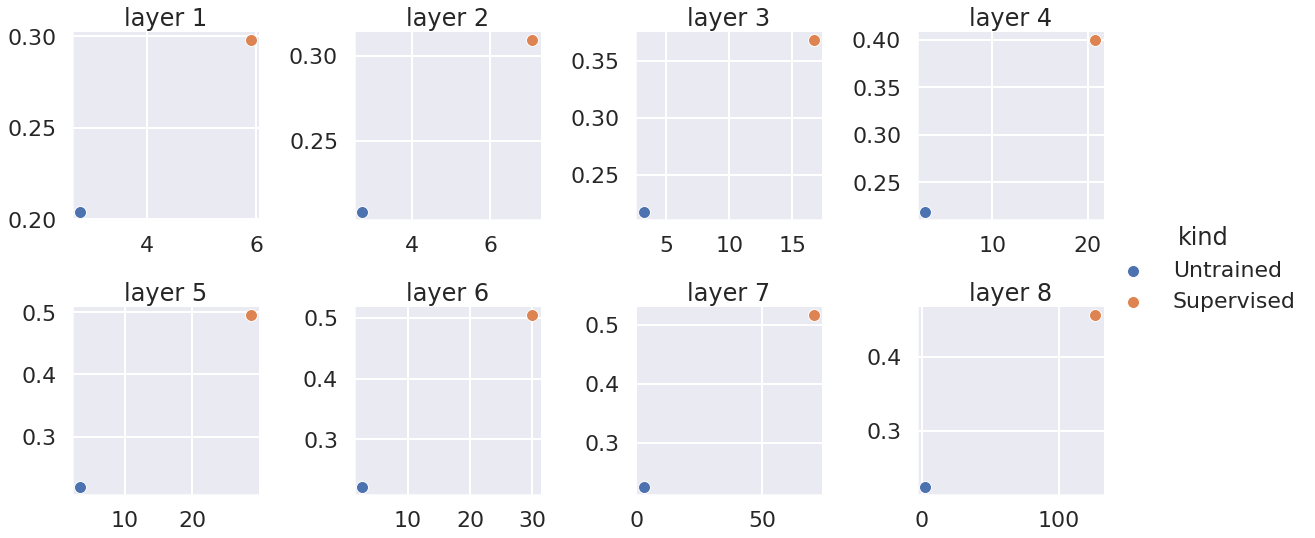

In [14]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]
g = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

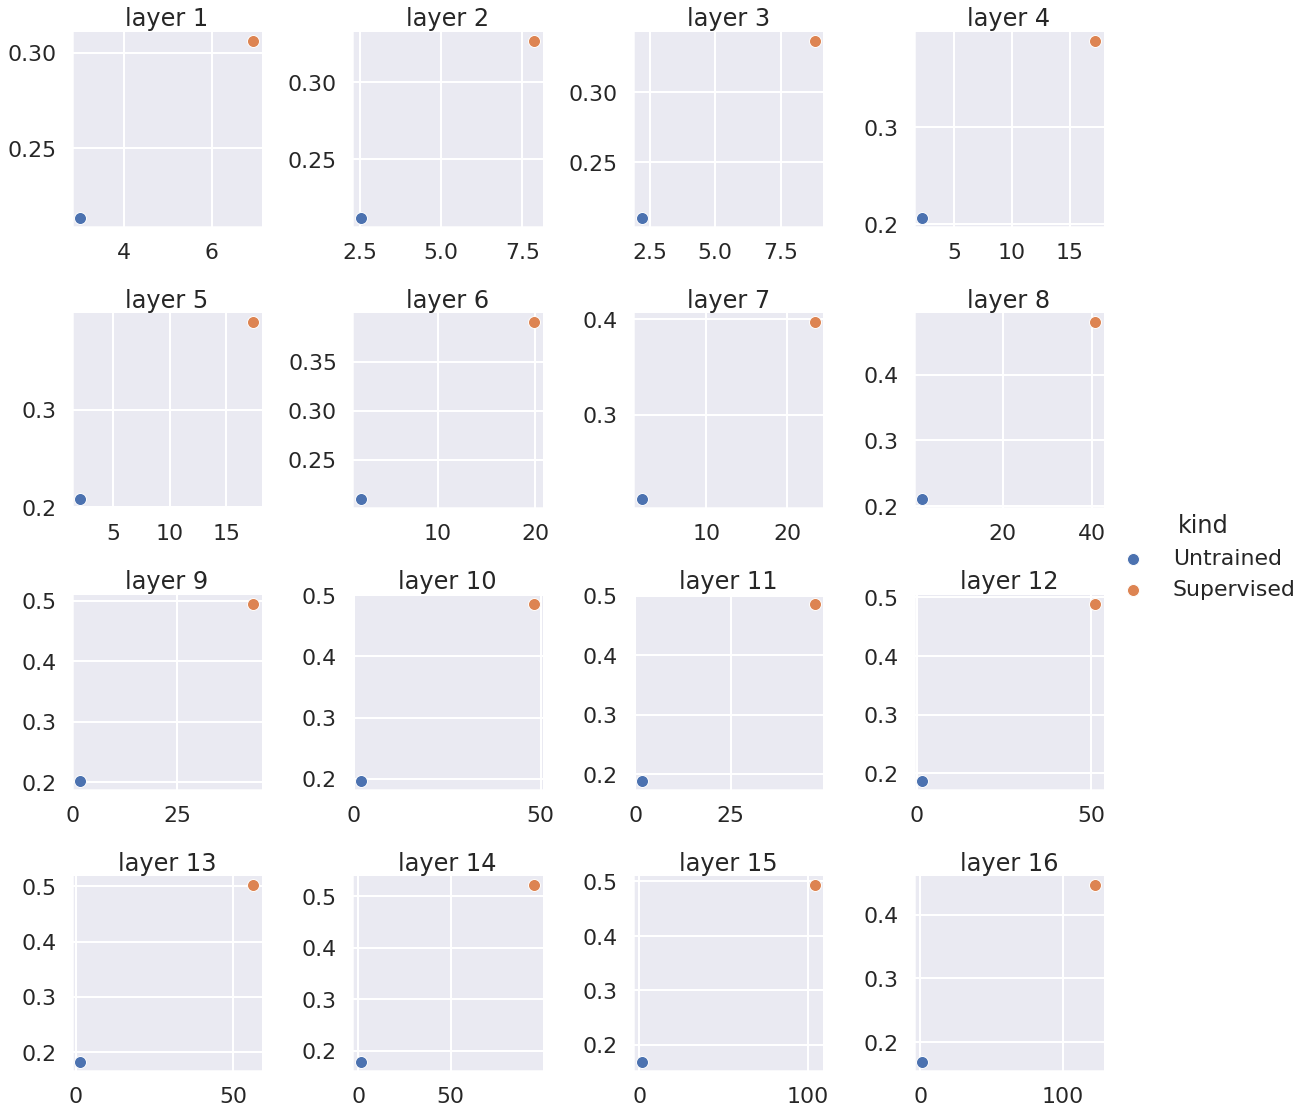

In [13]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet50')]
g = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

---
# Yamins Self-Supervised

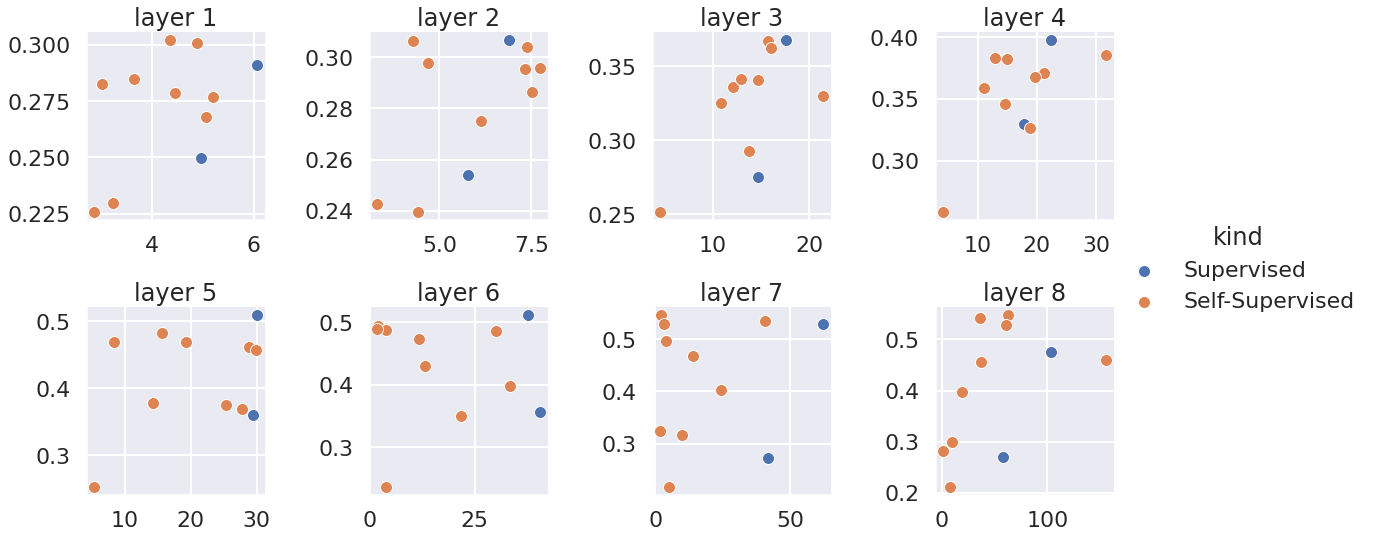

In [15]:
results = data[(data.source == 'VVS')]
g = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()

---
# Taskonomy

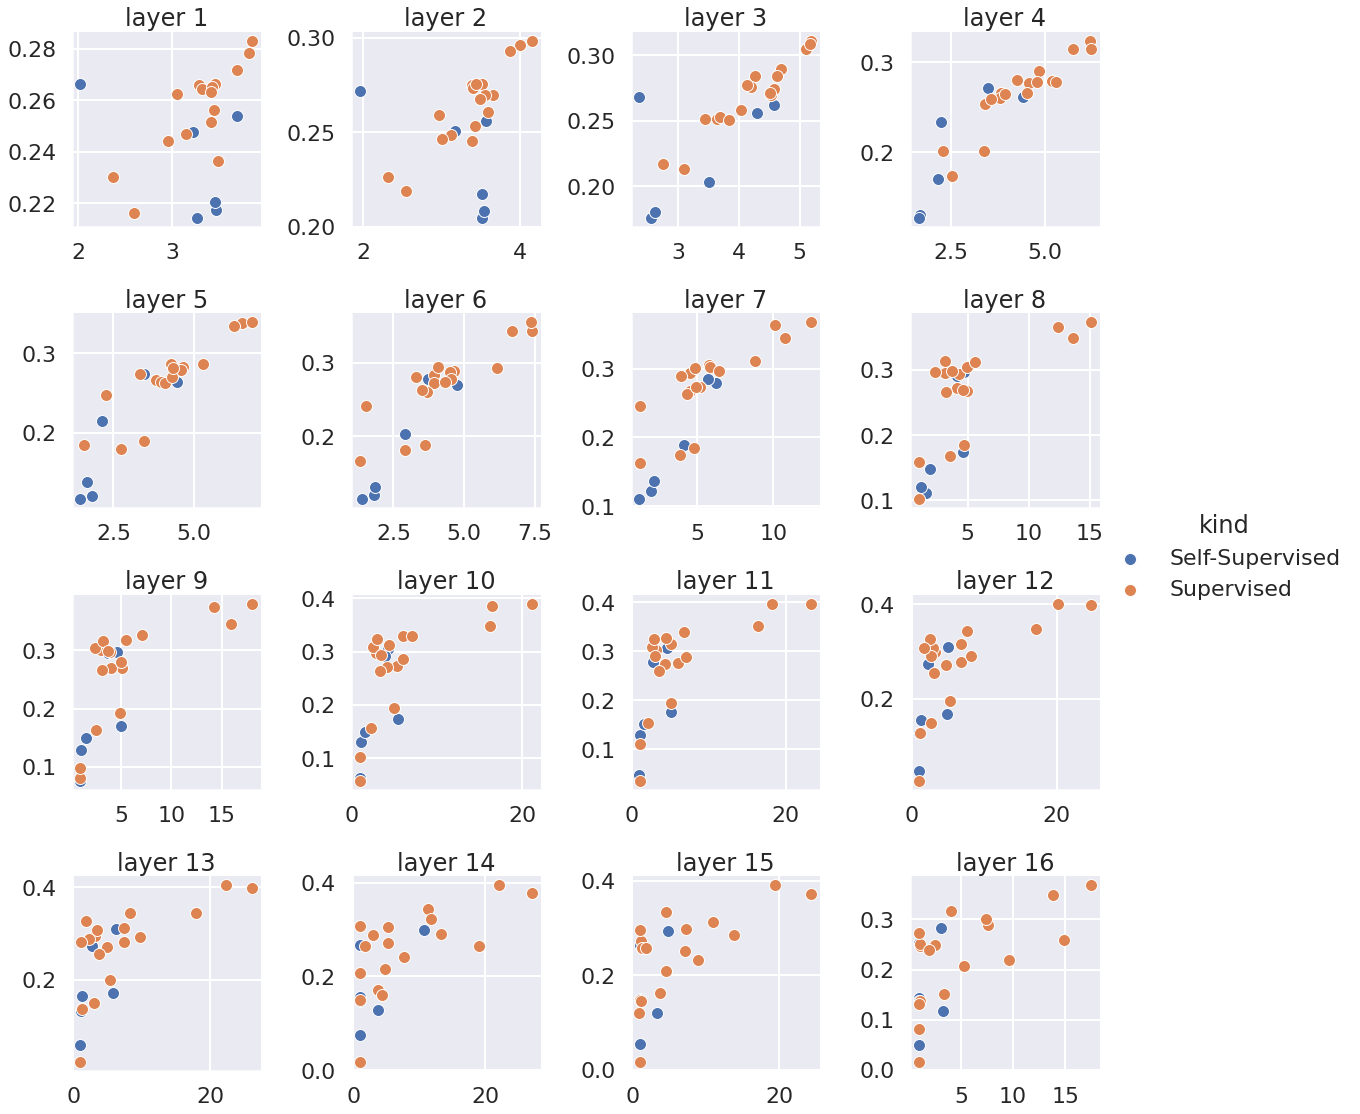

In [16]:
results = data[(data.source == 'Taskonomy')]
g = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.set(xlabel=None, ylabel=None)
plt.tight_layout()
g.add_legend()
plt.show()